In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_csv = pd.read_csv(city_data_to_load)
ride_csv = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride_df = pd.merge(city_csv, ride_csv, how = "outer", on="city")

# Display the data table for preview
city_ride_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

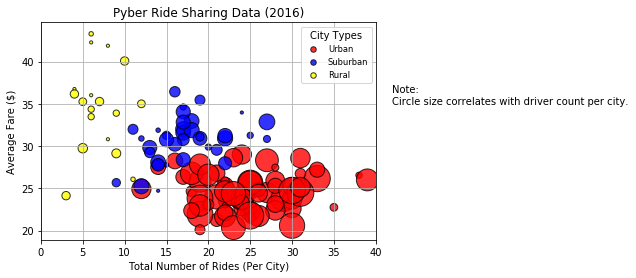

In [2]:
# Obtain the x and y coordinates for each of the three city types
urban_cities = city_ride_df[city_ride_df["type"] == "Urban"]
suburban_cities = city_ride_df[city_ride_df["type"] == "Suburban"]
rural_cities = city_ride_df[city_ride_df["type"] == "Rural"]

urban_ride_count = urban_cities.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_cities.groupby(["city"]).mean()["fare"]
urban_driver_count = urban_cities.groupby(["city"]).mean()["driver_count"]

suburban_ride_count = suburban_cities.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_cities.groupby(["city"]).mean()["fare"]
suburban_driver_count = suburban_cities.groupby(["city"]).mean()["driver_count"]

rural_ride_count = rural_cities.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_cities.groupby(["city"]).mean()["fare"]
rural_driver_count = rural_cities.groupby(["city"]).mean()["driver_count"]

# Build the scatter plots for each city types
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, c="red", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, c="blue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, c="yellow", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.xlim((0,40))
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City Types", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("PyberRideSharingData.png")

# Show plot
plt.show()

## Total Fares by City Type

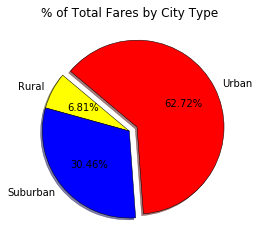

In [3]:
# Calculate Type Percents
type_percents = 100 * city_ride_df.groupby(["type"]).sum()["fare"] / city_ride_df["fare"].sum()

# Build Pie Chart
plt.pie(type_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["yellow", "blue", "red"], 
        explode=[0, 0, 0.1],
        autopct='%.2f%%', 
        shadow=True, 
        startangle=140,
        wedgeprops = {'linewidth':.5,'edgecolor': 'black'})
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("TotalFaresbyCityType.png")

# Show Figure
plt.show()

## Total Rides by City Type

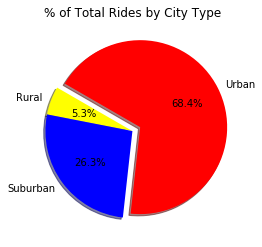

In [4]:
# Calculate Ride Percents
ride_percents = 100 * city_ride_df.groupby(["type"]).count()["ride_id"] / city_ride_df["ride_id"].count()

# Build Pie Chart
plt.pie(ride_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["yellow", "blue", "red"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', 
        shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("TotalRidesbyCityType.png")

# Show Figure
plt.show()

## Total Drivers by City Type

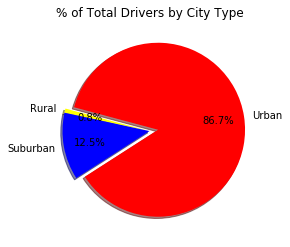

In [5]:
# Calculate Driver Percents
driver_percents = 100 * city_ride_df.groupby(["type"]).sum()["driver_count"] / city_ride_df["driver_count"].sum()

# Build Pie Charts
plt.pie(driver_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["yellow", "blue", "red"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', pctdistance=0.70,
        shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("TotalDriversbyCityType.png")

# Show Figure
plt.show()